In [1]:
## zip libraries
import zipfile

## random library
import random

## ENCODING DECODING LIBRARIES
import h5py
import json

## DIRECTORY LIBRARIES
import os
import glob

## IMAGE PROCESSING LIBRARIES
import cv2

## COMPUTATIONAL LIBRARIES
import numpy as np
import pandas as pd
import scipy
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

## MODEL BUILDING LIBRARIES
from keras.models import Sequential

## MODEL LAYER LIBRARIES
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

## METRICS LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc

## CALLBACK LIBRARIES
from keras.callbacks import LearningRateScheduler

## REGULARIZING LIBRARIES
from keras import regularizers

## DATA TRANSFORMATION LIBRARIES
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

## DATA VISUALIZING LIBRARIES
import matplotlib.cm as cm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## MOUTNING GOOGLE DRIVE to GOOGLE COLAB 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
### FETCHING ZIP FILE OF DATASET(ACRIMA) FROM GOOGLE DRIVE 
local_zip = '/content/drive/MyDrive/Copy of acrima .zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
### SEPARATING PATHS OF INFECTED AND UN-INFECTED IMAGES

## INFECTED --> ADVANCE_GLAUCOMA
## UN-INFECTED --> NORMAL_CONTROL
path_advance_glaucoma= '/content/acrima/advance_glaucoma/'
path_normal_control = '/content/acrima/normal_glaucoma/'

In [6]:
### UDF FOR STORING IMAGES
def load_data(data_path, target_size=(224,224)):
    img_arr_img = [] ### EMPTY LIST
    filelist_img = glob.glob(data_path+"*.jpg")
    image_paths = sorted(filelist_img)
    for image_path in image_paths:
        try:
            image = cv2.imread(image_path)
            image = cv2.resize(image, dsize=(224,224))
            #interpolation=cv2.INTER_CUBIC) #/255.0
            #cv2.normalize(image, image, 0, 255, cv2.NORM_MINMAX)
            img_arr_img.append(image)
        except (RuntimeError, TypeError,NameError) as e:
            print(e)
            pass
    return np.asarray(img_arr_img), image_paths

In [7]:
## LOADING INFECTED AND UN-INFECTED DATA INTO TWO FOLDERS THAT IS X_ADVANCE_GLAUCOMA AND X_NORMAL_CONTROL
X_advance_glaucoma, filenames_advance_glaucoma= load_data(path_advance_glaucoma)
X_normal_control, filenames_normal_control= load_data(path_normal_control)

In [9]:
# WE STACK VERTICALLY X_infected and X_uninfected TO MAKE THE DATA TENSOR X
X = np.vstack((X_advance_glaucoma, X_normal_control))
X1 = np.vstack((X_advance_glaucoma, X_normal_control))
##----------------------------------
# Let's create the labels vector
# 0 stands for  infected
# 1 stands for  not infected
##----------------------------------

labels = [0]*X_advance_glaucoma.shape[0] + [1]*X_normal_control.shape[0]

In [10]:
# SPLITTING TRAINING AND TESTING ARRAY DATA 
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=50)

In [11]:
## HERE, y_train IS CONVERTED TO ARRAY OF y_train
y_train = np.array(y_train)
print(y_train.shape)
print(y_train)

(563,)
[1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1
 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 0 0 1 0

In [12]:
## HERE, y_test IS CONVERTED TO ARRAY OF y_test
y_test = np.array(y_test)
print(y_test.shape)
print(y_test)

(141,)
[0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1]


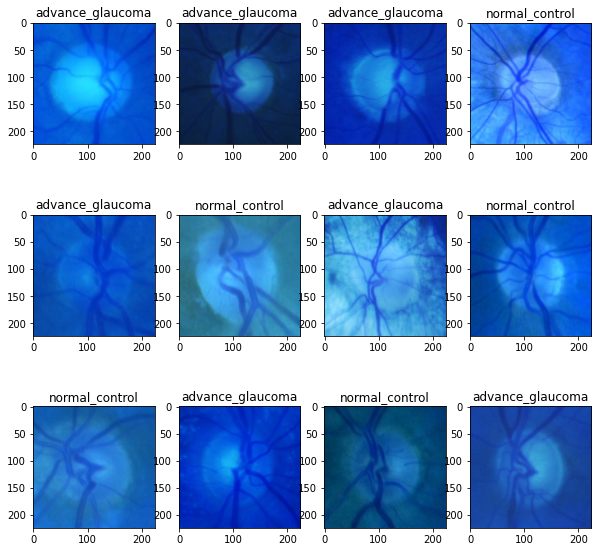

In [13]:
## PLOTTING FIGS INFECTED AND UN-INFECTED EYE WITH LABELS
fig = plt.figure(figsize=(10,10))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
    if y_train[i] == 0:
        plt.title('advance_glaucoma')
    else:
        plt.title('normal_control')
    
plt.show()

In [ ]:
## SPECIFYING IMAGE FEATURES
IMG_CHANNELS = 3
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [ ]:
## KERAS BACKEND
if K.image_data_format() == 'channels_first':
    input_shape = (IMG_CHANNELS, IMG_WIDTH, IMG_HEIGHT)
else:
    input_shape = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

In [ ]:
## IMAGE DATA AUGMENTATION
datagen = ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
datagen.fit(X_train)

In [ ]:
## CREATING MODEL USING UDF
def create_model(input_shape, with_summary):
    wd = 0.0001 
    model = Sequential() ## we are using SEQUENTIAL
    
    model.add(Conv2D(64, kernel_size=5, padding="same", input_shape=input_shape, activation = 'relu', kernel_regularizer=regularizers.l2(wd))) ### ADDING CONVOLUTIONAL2D 
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) ### ADDING MAXPOOLING2D
    model.add(BatchNormalization()) ### IT INCREASE SPPED OF TRAINING THE NETWORK TO ALLOW HIGHER LR, SO WE ARE ADDING BATCHNORMALIZATION LAYER
    ## IT ALSO CALCULATES MEAN AND VARIANCE OF LAYER INPUT

    model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd))) ### ADDING CONVOLUTIONAL2D 
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) ### ADDING MAXPOOLING2D
    model.add(BatchNormalization()) ### ADDING BATCHNORMALIZATION LAYER
    model.add(Dropout(0.1)) ### TO PREVENT OVERFITTING, WE ARE USING DROPOUT LAYER

    model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.1)) ## DROPING 10%

    #model.add(Conv2D(32, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    #model.add(BatchNormalization())
   #model.add(Dropout(0.1))
    
    #model.add(Conv2D(128, kernel_size=3, padding="valid", activation = 'relu',kernel_regularizer=regularizers.l2(wd)))
    #model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.1))

    model.add(Flatten()) ### ADDING FLATTEN LAYER 
    model.add(Dense(units=1000, activation='relu')) ## unit is parameter which defines size of the output from dense layer
    model.add(BatchNormalization())
    model.add(Dropout(0.5)) ## WE ARE DROPPING 50% OF THE NODES

    model.add(Dense(units=10, activation='relu')) 
    model.add(BatchNormalization())
    model.add(Dropout(0.1)) ## DROPPING 10% OF NODES

    model.add(Dense(units=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Dense(1)) ## DENSE(1) --> FOR EVERY IMAGE, THERE IS ONLY ONE OUTPUT WHICH IS LABELLED 0 OR 1
    model.add(Activation("sigmoid")) ## ACTIVATING SIGMOID FUNCTION 


    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    ## LOSS FUNCTION --> BINARY_CROSSENTROPY
    ## OPTIMIZER --> ADAM
    ## METRICS --> ACCURACY, WE ARE PASSING IT IN A LIST
    
    if with_summary:
        model.summary()

    return model
  


ONLY FEATURE EXTRACTING 

In [ ]:
def features(input_shape):
  wd = 0.0001
  model = Sequential() ## we are using SEQUENTIAL
    
  model.add(Conv2D(64, kernel_size=5, padding="same", input_shape=input_shape, activation = 'relu', kernel_regularizer=regularizers.l2(wd))) 
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  model.add(BatchNormalization()) 

  model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))  
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  model.add(BatchNormalization()) 
  model.add(Dropout(0.1)) 

  model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(BatchNormalization())

  model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.1)) ## DROPING 10%

  model.add(Flatten())
  
  return model

DISPLAYING IMAGE FEATURES BEFORE FEATURE EXTRACTION

In [ ]:
np.random.seed(42)
X1 = np.random.randint(0,255,size=(224,224,3))
print(X1.shape) # (430, 430, 3)

X1 = np.reshape(X1, (224*224, -1))
print(X1.shape)  # (184900, 3)

ans = np.array(X1)
headers = np.array(['r','g','b'])

df = pd.DataFrame(ans)
df.to_csv("answ.csv",index=False,header=headers)

(224, 224, 3)
(50176, 3)


DISPLAYING IMAGE FEATURES AFTER FEATURE EXTRACTION

In [ ]:
model = features(input_shape)
feature_values = model.predict(X_test)
# print(feature_values)
print(feature_values.shape)

#from keras.utils.vis_utils import plot_model
#plot_model(model, show_shapes=True, show_layer_names=True)

(141, 12544)


CREATING DATAFRAME TO DOWNLOAD OUTPUT AS EXCEL FILE

In [ ]:
df = pd.DataFrame(feature_values).T
#df
df.to_excel("prediction_featt.xlsx")

In [ ]:
### UDF FOR DEFINING EPOCH 
def lr_schedule(epoch):
  lrate = 0.001 ### LEARNING RATE
  if epoch > 75:
    lrate = 0.0001
  if epoch > 100:
    lrate = 0.001
  return lrate

In [ ]:
# Train the CNN Model
## KERAS CALLBACK --> functions or blocks of code which are executed during a specific instant while training a Deep Learning Model
#input_shape = (224, 224, 3)
model = create_model(input_shape =input_shape, with_summary =False)
## VALIDATION DATA --> X_test and y_test
history = model.fit(X_train, y_train, batch_size =64, epochs =100, validation_data =(X_test, y_test), callbacks =[LearningRateScheduler(lr_schedule)], verbose =1)
model.evaluate(X_test, y_test)

Epoch 1/100
9/9 [==============================] - 10s 515ms/step - loss: 0.5176 - accuracy: 0.7638 - val_loss: 6.0419 - val_accuracy: 0.4255 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 1s 167ms/step - loss: 0.3519 - accuracy: 0.8739 - val_loss: 2.5418 - val_accuracy: 0.4255 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 1s 160ms/step - loss: 0.2938 - accuracy: 0.9218 - val_loss: 1.8496 - val_accuracy: 0.4255 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 2s 170ms/step - loss: 0.2853 - accuracy: 0.9290 - val_loss: 2.2319 - val_accuracy: 0.4255 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 1s 161ms/step - loss: 0.2437 - accuracy: 0.9396 - val_loss: 1.5065 - val_accuracy: 0.4255 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 1s 160ms/step - loss: 0.2402 - accuracy: 0.9449 - val_loss: 1.1277 - val_accuracy: 0.4326 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - 1s 169ms/step - loss: 0.

[0.06868623197078705, 0.9858155846595764]

In [ ]:
#Saving - json file & .h5
model_json = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_json)
model.save_weights('model.h5')

In [ ]:
# Get the dictionary containing each metric and the loss for each epoch
#history_dict = history.history

In [ ]:
## we can access the loss and accuracy at any index
# print(history_dict['loss'][90])
# print(history_dict['accuracy'][91])
# print(history_dict['lr'][39])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


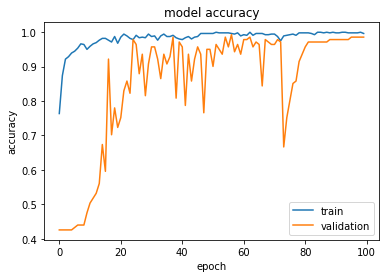

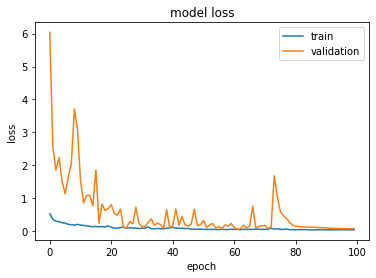

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
## PREDICTING THE MODEL
predictions = model.predict(X_test)
#predictions = np.array(predictions)

#print(predictions)
print(predictions.shape)

(141, 1)


In [ ]:
## TO GET VALUES GRETAER THAN 0.5
t = 0.5
prediction_bool = predictions > t

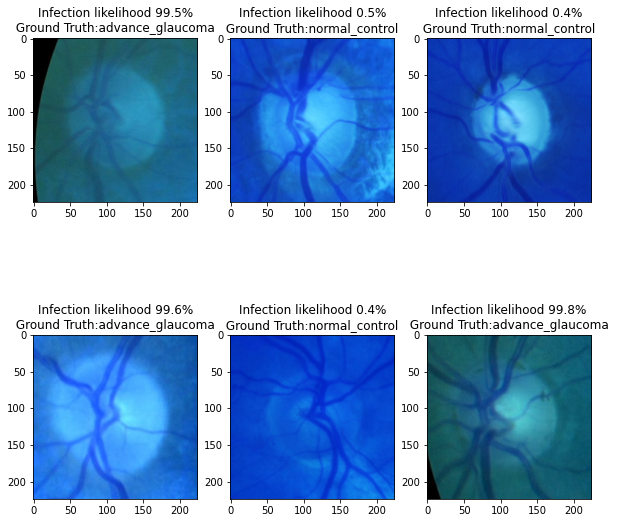

In [ ]:


## PLOTTING 
fig = plt.figure(figsize=(10, 10))
columns = 3
rows = 2
random_number = np.random.randint(0, X_test.shape[0]-26)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[i+random_number])
    gt = ['normal_control', 'advance_glaucoma']
    plt.title('Infection likelihood {:.1%}\n Ground Truth:{} '.format(float(predictions[i+random_number]), gt[y_test[i+random_number]]))
    
plt.show()

In [ ]:
model.test_on_batch(X_test, y_test)
model.metrics_names

['loss', 'accuracy']

In [ ]:
## PRINTING ACCURACY SCORE TEST VALUE
print('The accuracy obtained on the test set is:', accuracy_score(y_test, prediction_bool))

The accuracy obtained on the test set is: 0.9858156028368794


In [ ]:
### UDF FOR CONFUSION MATRIX
def draw_confusion_matrix(true,preds):
  conf_matx = confusion_matrix(true, preds)
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12}, fmt='g', cbar=False)
  plt.show()

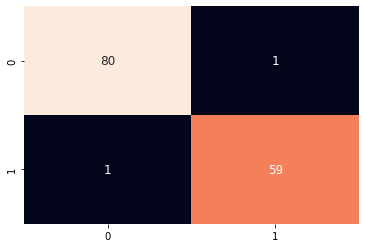

Confusion Matrix
                  precision    recall  f1-score   support

Advance Glaucoma       0.99      0.99      0.99        81
  Normal Control       0.98      0.98      0.98        60

        accuracy                           0.99       141
       macro avg       0.99      0.99      0.99       141
    weighted avg       0.99      0.99      0.99       141



In [ ]:
### CLASSIFICATION REPORT 
draw_confusion_matrix(y_test, prediction_bool)
print('Confusion Matrix')
target_names = ['Advance Glaucoma', 'Normal Control']
print(classification_report(y_test, prediction_bool, target_names = target_names))

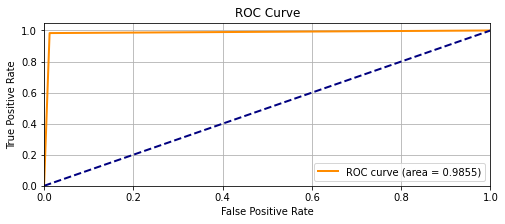

In [ ]:
# Get ROC curve FPR and TPR from true labels vs score values
fpr, tpr, _ = roc_curve(y_test, prediction_bool)


# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)


# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(y_test, prediction_bool)
plt.figure(figsize=(8, 3))
plt.subplot(1,1,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)